**Task:- To use this dataset of employee information and
build a model that can predict which
employees are most likely to leave the
company.**

# **1. Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report

In [2]:
churn = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
churn.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
churn.shape

(1470, 35)

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
churn.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


# **2. Data Checks**

### **2.1 Check for Null Values**

In [7]:
churn.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### **2.2 Check for duplicate values**

In [8]:
churn.duplicated().sum()

0

### **2.3 Check for unique values**

In [9]:
churn.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

# **3. Exploratory Data Analysis**

### **3.1 Attrition Count**

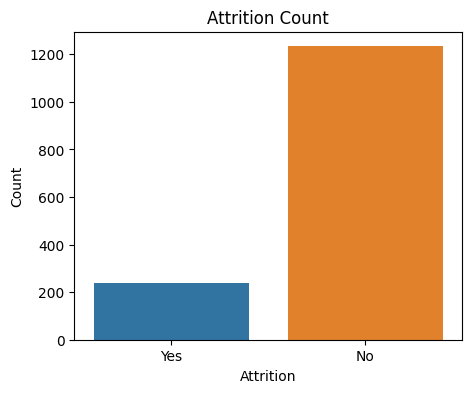

In [10]:
plt.figure(figsize=(5, 4))
sns.countplot(data=churn, x='Attrition')
plt.title('Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

**More employees have stayed in the company as compared to people leaving the company.**


### **3.2 Attrition based on age**

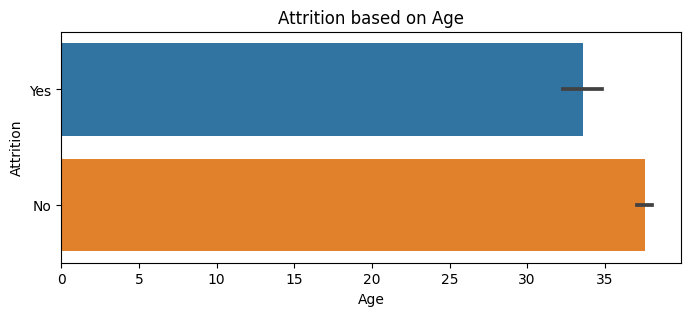

In [11]:
plt.figure(figsize=(8, 3))
sns.barplot(data=churn, x='Age', y='Attrition')
plt.title('Attrition based on Age')
plt.xlabel('Age')
plt.ylabel('Attrition')
plt.show()

**This suggests that employees around the age of 34 tend to have a higher attrition rate, while employees above the age of 35 are less likely to leave.**

### **3.3 Attrition based on gender**

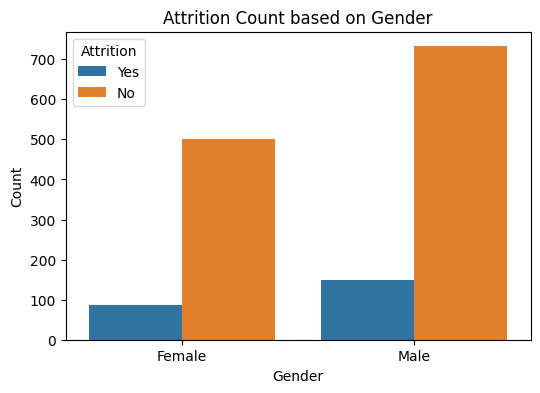

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=churn, x='Gender', hue='Attrition')
plt.title('Attrition Count based on Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Males are more likely to leave the company compared to females.**

### **3.4 Attrition based on Department**

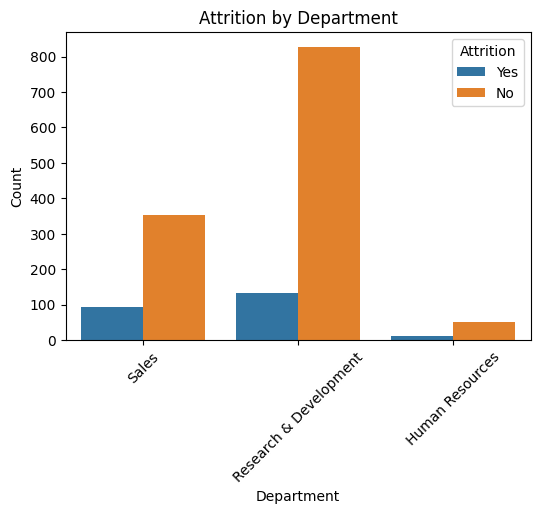

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=churn, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**It is clear from the above visual that the Research & Development department and Sales dpartment comparatively has the highest attrition rate as compared to the Human Resource.**

### **3.5 Attrition based on Each Job Role**

<Figure size 1600x1200 with 0 Axes>

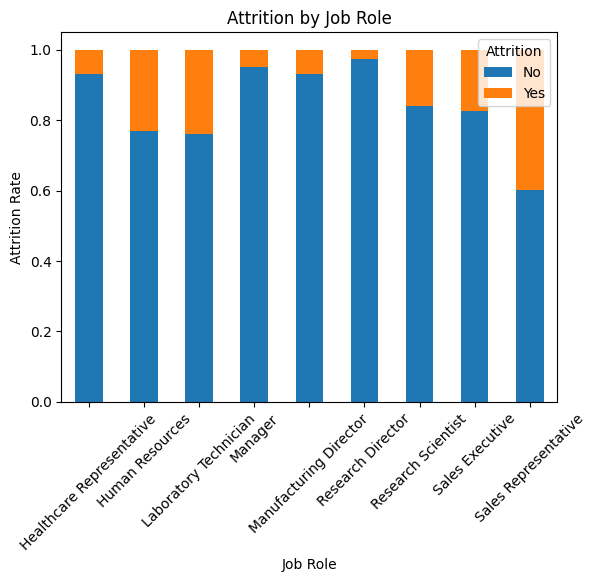

In [14]:
attrition_by_job_role = churn.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack()

plt.figure(figsize=(4, 3), dpi=400)
attrition_by_job_role.plot(kind='bar', stacked=True)
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()

**The Sales Representative has the highest attrition rate among all.**

### **3.6 Attrition based on Marital Status**

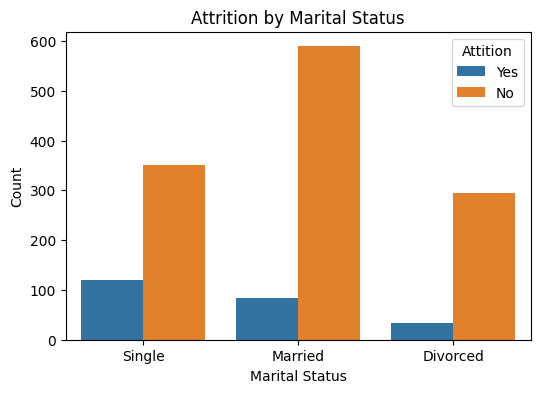

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=churn, x='MaritalStatus', hue='Attrition')
plt.title('Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Attition', loc='upper right')
plt.show()

**This suggests that single employees are more likely to leave the company than married or divorced employees.**

### **3.7 Attrition based on Education field**

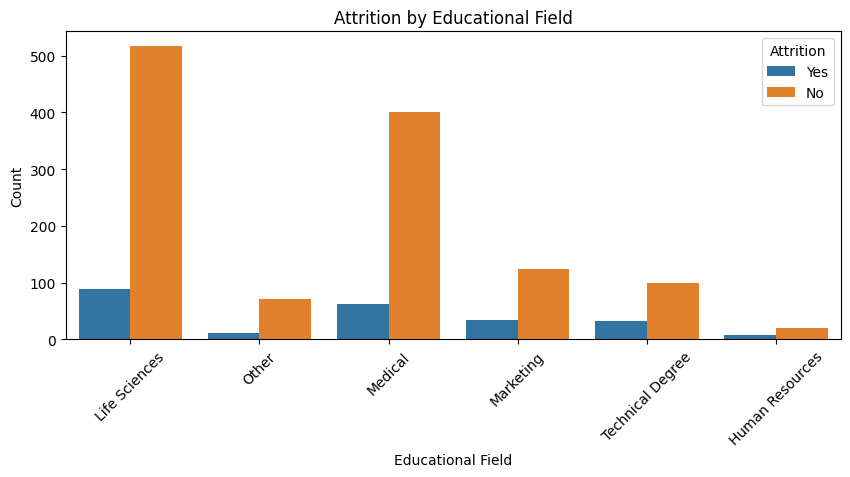

In [16]:
plt.figure(figsize=(10, 4))
sns.countplot(data=churn, x='EducationField', hue='Attrition')
plt.title('Attrition by Educational Field')
plt.xlabel('Educational Field')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(rotation=45)
plt.show()

**Life Sciences and Medical may be more likely to be dissatisfied with their current role or company or it may be possible that these employees are more likely to be looking for a higher salary or better benefits.**


### **3.8 Attrition based on Job Level**

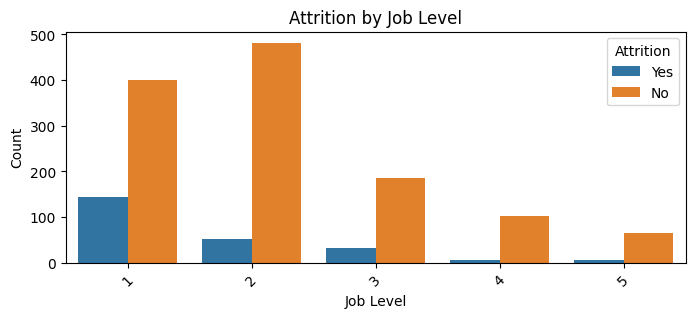

In [17]:
plt.figure(figsize=(8, 3))
sns.countplot(data=churn, x='JobLevel', hue='Attrition')
plt.title('Attrition by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**The employees with lowest level of job are more likely to leave the company. It can be possible that they are getting good opportunities from other companies.**

### **3.9 Identifying Outliers:**

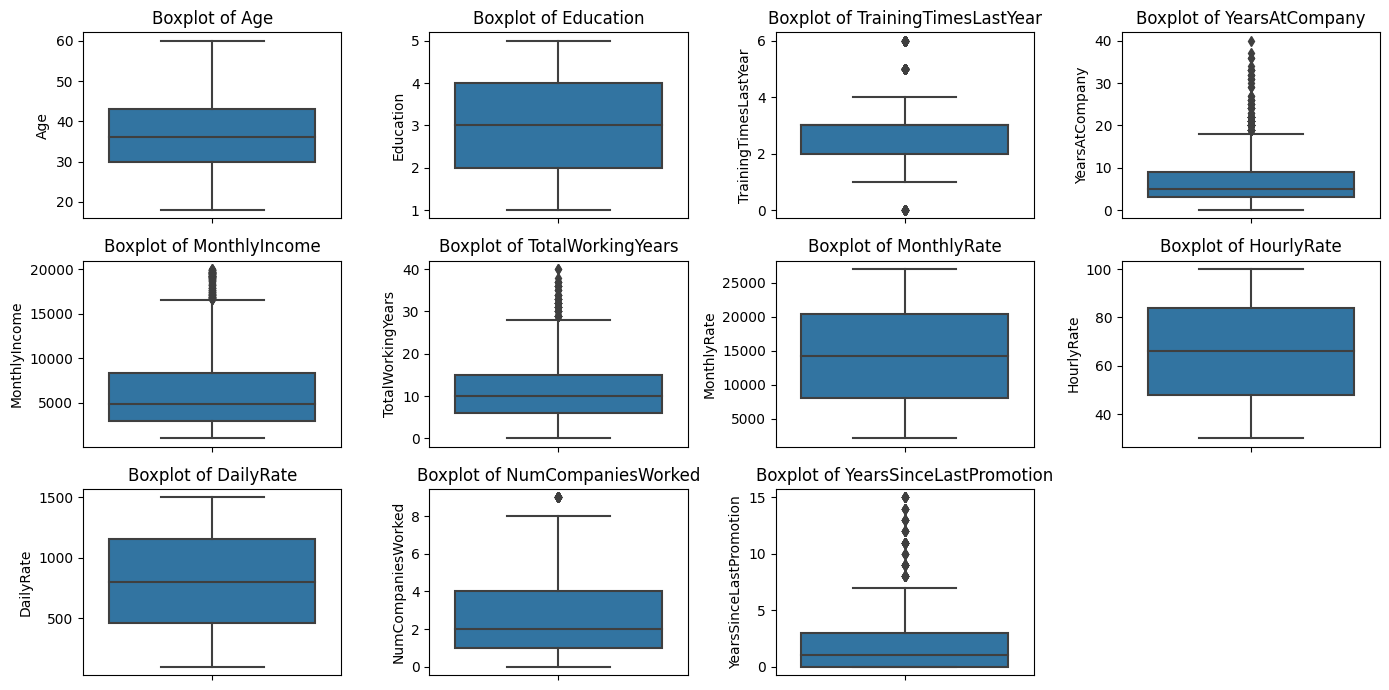

In [18]:
numerical_columns = ['Age', 'Education', 'TrainingTimesLastYear', 'YearsAtCompany', 'MonthlyIncome', 'TotalWorkingYears',
                     'MonthlyRate', 'HourlyRate', 'DailyRate', 'NumCompaniesWorked', 'YearsSinceLastPromotion']


plt.figure(figsize=(14, 7))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=churn, y=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

**Capping the outliers:**

In [19]:
Columns_with_outliers = ['TrainingTimesLastYear', 'YearsAtCompany', 'TotalWorkingYears',
                         'NumCompaniesWorked', 'YearsSinceLastPromotion']

def cap_outliers(df, columns_with_outliers):
    for column in columns_with_outliers:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else x)
        df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)

    return df
churn = cap_outliers(churn, Columns_with_outliers)

**visualizing boxplot after capping outliers:**

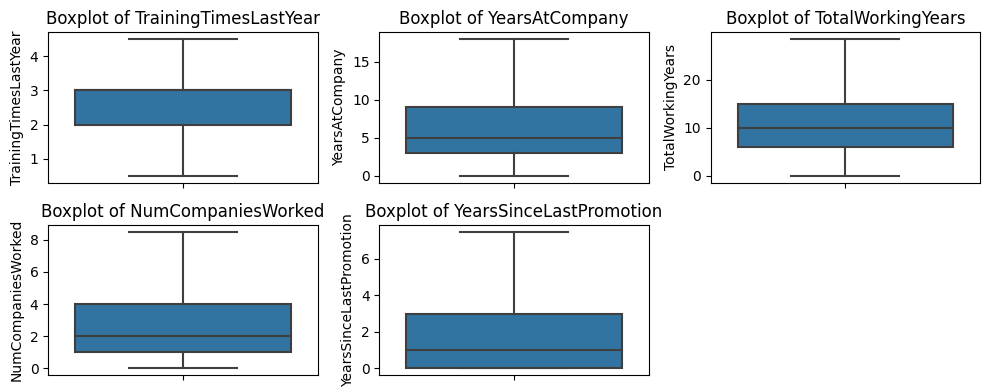

In [20]:
numerical_columns = ['TrainingTimesLastYear', 'YearsAtCompany', 'TotalWorkingYears',
                     'NumCompaniesWorked', 'YearsSinceLastPromotion']

plt.figure(figsize=(10, 4))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=churn, y=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

# **4. Data Preprocessing**

In [21]:
Independent = churn.drop(columns=['Attrition'], axis=1)
Dependent = churn['Attrition']

### **4.1 Encoding Categorical Variables:**

In [22]:
Ordinal = OrdinalEncoder()
Independent[["EducationField", "JobRole"]] = Ordinal.fit_transform(Independent[["EducationField", "JobRole"]])


categorical_columns = ['BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 'Over18', 'OverTime']
pd.get_dummies(Independent, columns=categorical_columns, drop_first=True)


label_encoder = LabelEncoder()
categorical_columns = Independent.select_dtypes(include=['object','category']).columns
for column in categorical_columns:
    Independent[column] = label_encoder.fit_transform(Independent[column])


Dependent = label_encoder.fit_transform(Dependent)

### **4.2 Data Splitting:**

In [23]:
X = Independent
y = Dependent

### **4.3 Feature Selection by using SelectKBest:**

In [24]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']

Bestfeatures = featureScores.nlargest(10,'Score')
print(Bestfeatures)

                Features          Score
17         MonthlyIncome  127922.293694
18           MonthlyRate    1196.633553
2              DailyRate     956.580494
27     TotalWorkingYears     230.277490
30        YearsAtCompany     145.425656
31    YearsInCurrentRole     117.522596
33  YearsWithCurrManager     110.671534
0                    Age      84.155277
21              OverTime      63.845067
4       DistanceFromHome      63.772142


# **5. Training and Testing Data**


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

X_train = X_train.loc[:, X_train.apply(pd.Series.var) != 0]
X_test = X_test.loc[:, X_test.columns.isin(X_train.columns)]

In [26]:
selector = SelectKBest(score_func=f_classif, k=7)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# **6. Model Training**

### **6.1 Support Vector Machine:**

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_selected)
X_test = scaler.transform(X_test_selected)

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_selected, y_train)
y_pred_test_svm = svm.predict(X_test_selected)

accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
report_test_svm = classification_report(y_test, y_pred_test_svm, zero_division=1)

print("SVM Accuracy Score on Test Dataset : {:.2f}%".format(accuracy_test_svm*100))
print("\nClassification Report on Test Dataset:\n")
print(report_test_svm)

SVM Accuracy Score on Test Dataset : 86.17%

Classification Report on Test Dataset:

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       1.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.93      0.50      0.46       441
weighted avg       0.88      0.86      0.80       441



### **6.2 Naive Bayes:**

In [28]:
gnb = GaussianNB()
gnb.fit(X_train_selected, y_train)
y_pred_test_gnb = gnb.predict(X_test_selected)

accuracy_test_gnb = accuracy_score(y_test, y_pred_test_gnb)
report_test_gnb = classification_report(y_test, y_pred_test_gnb, zero_division=1)

print("Naive Bayes Accuracy Score on Test Dataset : {:.2f}%".format(accuracy_test_gnb*100))
print("\nClassification Report on Test Dataset:\n")
print(report_test_gnb)

Naive Bayes Accuracy Score on Test Dataset : 78.68%

Classification Report on Test Dataset:

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       380
           1       0.27      0.31      0.29        61

    accuracy                           0.79       441
   macro avg       0.58      0.59      0.58       441
weighted avg       0.80      0.79      0.79       441



### **6.3 Logistic Regression:**

In [29]:
lg_model = LogisticRegression(max_iter=1000 )
lg_model.fit(X_train_selected, y_train)
y_pred_test_lg = lg_model.predict(X_test_selected)

accuracy_test_lg = accuracy_score(y_test, y_pred_test_lg)
classification_rep_lg = classification_report(y_test, y_pred_test_lg)

print("Logistic Regression Accuracy Score on Test Data : {:.2f}%".format(accuracy_test_lg*100))
print("\nClassification Report on Test Dataset:\n")
print(classification_rep_lg)

Logistic Regression Accuracy Score on Test Data : 85.94%

Classification Report on Test Dataset:

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       380
           1       0.45      0.08      0.14        61

    accuracy                           0.86       441
   macro avg       0.66      0.53      0.53       441
weighted avg       0.81      0.86      0.81       441



**It can be concluded that Support vector Machine performed the best among all three models and that SVM can be used for deployment of this model.**